A: ['B']
B: ['A', 'C', 'D']
C: ['B', 'D']
D: ['C', 'B']


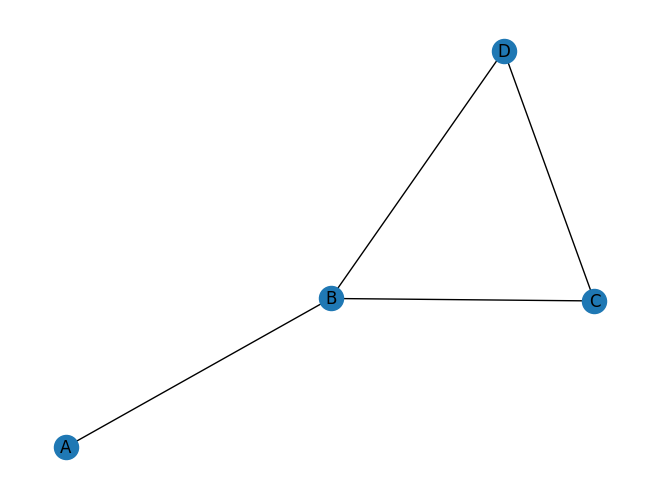

In [56]:
from collections import defaultdict

# Create an empty graph
graph = defaultdict(list)

# Add edges to the graph
graph['A'] = ['B']
graph['B'] = ['A', 'C','D']
graph['C'] = ['B','D']
graph['D'] = ['C','B']

# Print the graph
for node, neighbors in graph.items():
    print(f"{node}: {neighbors}")

import networkx as nx
import matplotlib.pyplot as plt 

G = nx.Graph()

G.add_edges_from([('A','B') , ('B','C') , ('C','D') , ('B','D')])

nx.draw(G,with_labels = True)
plt.show()


In [57]:
# cycle detection in graph 
# using dfs 

def is_cyclic(graph):
    visited = set()

    def dfs(node , parent):
        visited.add(node)

        for it in graph[node]:
            if it not in visited:
                if dfs(it,node):
                    return True
            elif it != parent:
                return True
        return False
    

    for node in graph:
        if node not in visited:
            if dfs(node,None):
                return True
    return False



if is_cyclic(graph):
    print('The graph contains a cycle')
else :
    print('No cycle ')




The graph contains a cycle


In [59]:
# using BFS 
from collections import defaultdict, deque

def is_cyclic(graph):
    visited = set()
    def bfs(node):
        queue = deque([(node, None)])
        while queue:
            node, parent = queue.popleft()
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    queue.append((neighbor, node))
                elif neighbor != parent:
                    return True
        return False

    for node in graph:
        if node not in visited:
            if bfs(node):
                return True
    return False

BIPARTITE 

In [60]:
# using DFS

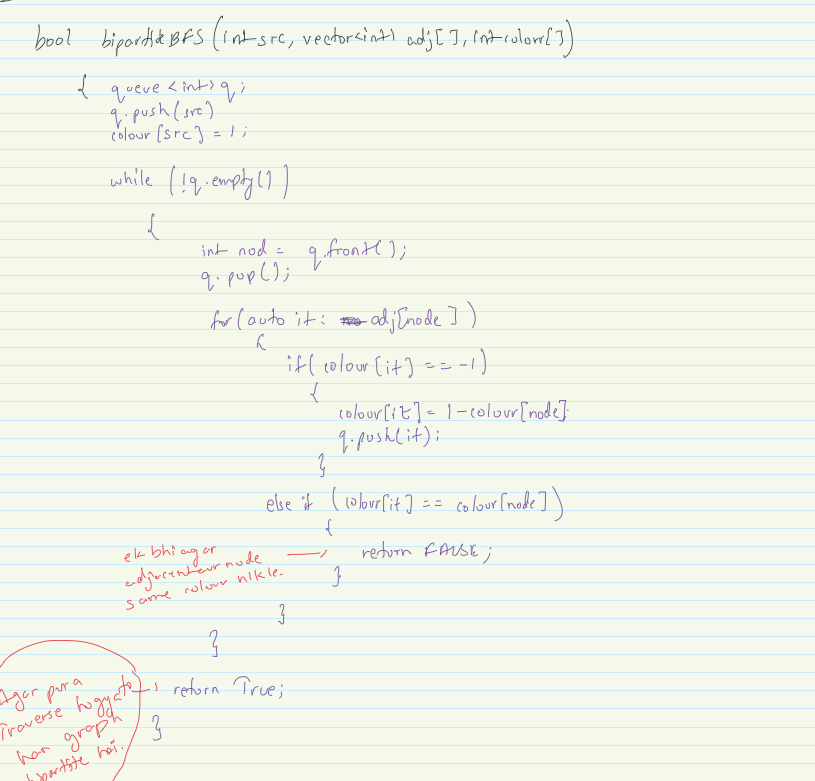

TOPO SORT 

In [61]:
def topological_sort(graph):
    visited = set()
    result = []
    def dfs(node):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                dfs(neighbor)
        result.append(node)

    for node in graph:
        if node not in visited:
            dfs(node)
    return result[::-1]

# Create a graph
graph = defaultdict(list)

# Add edges to the graph
graph['A'] = ['B', 'C']
graph['B'] = ['D']
graph['C'] = ['D']
graph['D'] = []

# Perform a topological sort
order = topological_sort(graph)

# Print the result
print(order)

['A', 'C', 'B', 'D']


In [62]:
# KAHN ALGO

In [63]:
from collections import defaultdict, deque

def topological_sort(graph):
    # Compute in-degrees of all nodes
    in_degree = defaultdict(int)
    for node in graph:
        for neighbor in graph[node]:
            in_degree[neighbor] += 1

    # Initialize a queue with all nodes that have in-degree 0
    queue = deque(node for node in graph if in_degree[node] == 0)

    # Perform the topological sort
    result = []
    while queue:
        node = queue.popleft()
        result.append(node)
        for neighbor in graph[node]:
            in_degree[neighbor] -= 1
            if in_degree[neighbor] == 0:
                queue.append(neighbor)

    return result

SHORTEST PATH WITH UNIT WEIGHTS 

In [64]:
from collections import defaultdict, deque

def shortest_path(graph, start, end):
    # Initialize a queue and a visited set
    queue = deque([(start, [start])])
    visited = set()

    # Perform a BFS
    while queue:
        node, path = queue.popleft()
        if node == end:
            return path, len(path) - 1
        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                queue.append((neighbor, path + [neighbor]))

    # No path found
    return None

# Create a graph
graph = defaultdict(list)

# Add edges to the graph
graph['A'] = ['B', 'C']
graph['B'] = ['A', 'D']
graph['C'] = ['A', 'D']
graph['D'] = ['B', 'C']

# Find the shortest path between two nodes
path, length = shortest_path(graph, 'A', 'D')

# Print the result
print(f"The shortest path is: {path}")
print(f"The length of the shortest path is: {length}")

The shortest path is: ['A', 'B', 'D']
The length of the shortest path is: 2


DIJKSTRA FOR UNDIRECTED WITH WEIGHTS 

In [67]:
from collections import defaultdict
import heapq

def dijkstra(graph, start):
    # Create a dictionary to keep track of the shortest path to each node
    # Initialize all nodes except the starting node to have infinite distance
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    
    # Create a priority queue to keep track of nodes to visit
    queue = [(0, start)]
    
    # Loop until all nodes have been visited
    while queue:
        # Get the node with the smallest distance from the priority queue
        (current_distance, current_node) = heapq.heappop(queue)
        
        # If the current distance is greater than the known distance to this node, skip it
        if current_distance > distances[current_node]:
            continue
        
        # Loop through all neighbors of the current node
        for neighbor, weight in graph[current_node].items():
            # Calculate the distance to this neighbor through the current node
            distance = current_distance + weight
            
            # If this distance is shorter than the current known distance to the neighbor, update it
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))
    
    # Return the shortest distances to all nodes from the starting node
    return distances


# Create the graph using a defaultdict
graph = defaultdict(dict)

graph['A']['B'] = 5
graph['A']['C'] = 1
graph['B']['A'] = 5
graph['B']['C'] = 2
graph['B']['D'] = 1
graph['C']['A'] = 1
graph['C']['B'] = 2
graph['C']['D'] = 4
graph['C']['E'] = 8
graph['D']['B'] = 1
graph['D']['C'] = 4
graph['D']['E'] = 3
graph['D']['F'] = 6
graph['E']['C'] = 8
graph['E']['D'] = 3
graph['F']['D'] = 6

# Call the dijkstra function to find the shortest paths from node 'A'
shortest_paths = dijkstra(graph, 'A')

# Print the result
print(shortest_paths)


{'A': 0, 'B': 3, 'C': 1, 'D': 4, 'E': 7, 'F': 10}
